In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

In [16]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Work\Silent_commute\data\with_stress.csv")
df['date'] = pd.to_datetime(df['date'])

In [19]:
# Line chart: stress over time for a route
# filter
city, route = "CityA", "A1"
d = df[(df.city==city) & (df.route==route)]

fig = px.line(d, x='date', y='stress_pct', title=f"Stress over time — {city} {route}",
              labels={'stress_pct':'Stress (0-100)'})
fig.show()

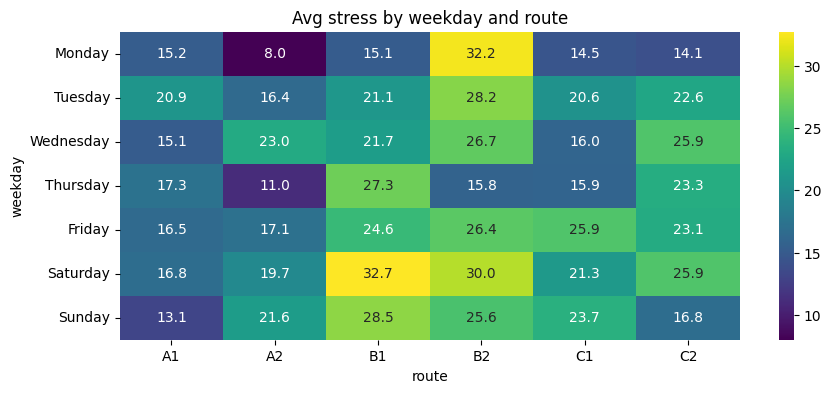

In [20]:
# Heatmap: weekday vs average stress
df['weekday'] = df['date'].dt.day_name()
pivot = df.groupby(['weekday','route'])['stress_pct'].mean().unstack()
# re-order weekdays
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot = pivot.reindex(order)

plt.figure(figsize=(10,4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="viridis")
plt.title("Avg stress by weekday and route")
plt.show()